# House Prices - Kaggle

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Training Dataset

In [102]:
house_train = pd.read_csv("train.csv")

In [103]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
house_test = pd.read_csv("test.csv")

In [105]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [106]:
#Creating a new df for house id
house_id_train = house_train[["Id"]]
house_id_test = house_test[["Id"]]

In [107]:
house_id_train.head()

,Id
0,1
1,2
2,3
3,4
4,5


In [108]:
house_id_test.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [109]:
#Obtaining the shape of the dataset to make sure that the train and the test set are the same shape
house_train.shape

(1460, 81)

In [110]:
house_test.shape

(1459, 80)

In [111]:
#Extracting the target Variable out 
y = house_train[["SalePrice"]]

In [112]:
#Dropping the target Variable from the training dataset
house_train = house_train.drop(["Id","SalePrice"],axis=1)

In [113]:
house_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Data Processing

### Gaining Info 

In [114]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Since we are going to implement Linear Regression, we would need to work with numeric variables only, hence we would need to do One-Hot Encoding to convert the features of Object data type to integer. Before that, we should remove Null Values.

##### Points to Note:

For Linear Regression, there should not be variables which are strongly co-related or this can affect the predictions. These are called Redundant Features and one of them should be removed. 

Need to look at the range of each feature too, as if the range of each feature is too different from the other features then would need to do Feature Scaling. There are 2 types of process in this, one would be scaling down using the range and the other is mean normalisation. Therefore, need to create a new df with numeric values and a separate df with non-numeric values.


### Getting the Correlation between Features

In [115]:
house_test = house_test.drop(["Id"],axis=1)

In [116]:
house_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [117]:
#Need to merge the train and test df into one before doing any processing 
house = pd.concat([house_train,house_test],axis=0)

In [118]:
house.shape

(2919, 79)

In [119]:
corr_df = pd.DataFrame(house.corr())

In [120]:
a = corr_df[((corr_df >= 0.8) & (corr_df != 1))]

In [121]:
#There are 36x36 df, therefore there are 36*36 = 1296 cells/values. 
a.shape

(36, 36)

In [122]:
a.isnull().sum()

MSSubClass       36
LotFrontage      36
LotArea          36
OverallQual      36
OverallCond      36
YearBuilt        35
YearRemodAdd     36
MasVnrArea       36
BsmtFinSF1       36
BsmtFinSF2       36
BsmtUnfSF        36
TotalBsmtSF      35
1stFlrSF         35
2ndFlrSF         36
LowQualFinSF     36
GrLivArea        35
BsmtFullBath     36
BsmtHalfBath     36
FullBath         36
HalfBath         36
BedroomAbvGr     36
KitchenAbvGr     36
TotRmsAbvGrd     35
Fireplaces       36
GarageYrBlt      35
GarageCars       35
GarageArea       35
WoodDeckSF       36
OpenPorchSF      36
EnclosedPorch    36
3SsnPorch        36
ScreenPorch      36
PoolArea         36
MiscVal          36
MoSold           36
YrSold           36
dtype: int64

From this we can see that, some features have values with correlation greater than or equal to 0.8 and not 1. These features are:

1. YearBuilt 
2. TotalBsmtSF     
3. 1stFlrSF 
4. GrLivArea
5. TotRmsAbvGrd
6. GarageYrBlt     
7. GarageCars     
8. GarageArea  

In [123]:
corr_df_val = corr_df[["YearBuilt","TotalBsmtSF","1stFlrSF","GrLivArea","TotRmsAbvGrd","GarageYrBlt","GarageCars","GarageArea"]]

In [124]:
corr_df_val.shape

(36, 8)

In [125]:
corr_df_val[((corr_df_val >= 0.8) & (corr_df_val != 1))]

,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
MSSubClass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,0.834812,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From this we can observe that there are features with strong correlaiton to each other, this would affect the predictions as if normal equation was to be implemented then, the matrix (X_transpose * X) would not be able to have an inverse which would result in non-optimal parameters being found for the cost function. Hence, it is best to remove these redundant fetaures if context permits.

#### Analysis of the highly Correlated Features:

##### YearrBuilt and GarageYrBlt

YearBuilt - the year the house was built

GarageYrBlt - the year the garage was built

Logically speaking, the garage would be built at the same time as the house (give and take a few months), and the garage is usually built after the house has been built. Hence, it won't cause harm if we rmeove the GarageYrBlt as although the price of garage is included in the SalePrice, but is not mandatory and removing this would not affect the predictions adversely.


##### TotalBsmtSf and 1stFlrSf

TotalBsmtSf - Total Square feet of the Basement

1stFlrSf - Total Square feet of the 1st floor

Removing any one of these features would not be beneficial as they contribute a decent extent to the SalePrice. 


##### GrLivArea and TotRmsAbvGrd

GrLivArea - Above grade (ground) living area square feet

TotRmsAbvGrd -  Total rooms above grade (does not include bathrooms)

Would not remove!

##### GarageCars and GarageArea

GarageCars - size of garage in car capacity

GarageArea - Size of garage in square feet

GarageArea would be a better unit to judge the Garage instead of Car Capacity and hence, the feature GarageCars is redundant.

In [126]:
#removing the redundant features from the train set
house = house.drop(["GarageYrBlt","GarageCars"],axis=1)

In [127]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Separating the Numeric and Non-Numeric Features

In [128]:
house_numeric = house_train.select_dtypes(include=["int64","float64"])

In [129]:
house_non_numeric = house_train.select_dtypes(include=["object"])

In [130]:
house_numeric.shape

(1460, 36)

In [131]:
house_non_numeric.shape

(1460, 43)

### Numeric Features

In [132]:
house_numeric.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [133]:
house_numeric.max()

MSSubClass          190.0
LotFrontage         313.0
LotArea          215245.0
OverallQual          10.0
OverallCond           9.0
YearBuilt          2010.0
YearRemodAdd       2010.0
MasVnrArea         1600.0
BsmtFinSF1         5644.0
BsmtFinSF2         1474.0
BsmtUnfSF          2336.0
TotalBsmtSF        6110.0
1stFlrSF           4692.0
2ndFlrSF           2065.0
LowQualFinSF        572.0
GrLivArea          5642.0
BsmtFullBath          3.0
BsmtHalfBath          2.0
FullBath              3.0
HalfBath              2.0
BedroomAbvGr          8.0
KitchenAbvGr          3.0
TotRmsAbvGrd         14.0
Fireplaces            3.0
GarageYrBlt        2010.0
GarageCars            4.0
GarageArea         1418.0
WoodDeckSF          857.0
OpenPorchSF         547.0
EnclosedPorch       552.0
3SsnPorch           508.0
ScreenPorch         480.0
PoolArea            738.0
MiscVal           15500.0
MoSold               12.0
YrSold             2010.0
dtype: float64

###  Exploratory Data Analysis

In [139]:
house_numeric = pd.concat([house_numeric,y],axis=1)

In [140]:
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,250000


In [141]:
house_numeric_corr = house_numeric.corr()

In [142]:
house_numeric_corr = house_numeric_corr[["SalePrice"]]

In [143]:
house_numeric_corr

,SalePrice,SalePrice
MSSubClass,-0.084284,-0.084284
LotFrontage,0.351799,0.351799
LotArea,0.263843,0.263843
OverallQual,0.790982,0.790982
OverallCond,-0.077856,-0.077856
YearBuilt,0.522897,0.522897
YearRemodAdd,0.507101,0.507101
MasVnrArea,0.477493,0.477493
BsmtFinSF1,0.386420,0.386420
BsmtFinSF2,-0.011378,-0.011378


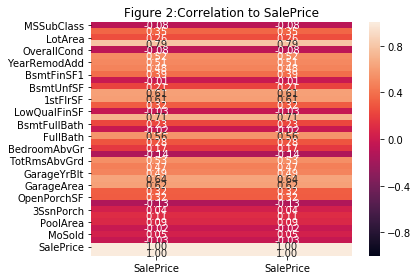

In [144]:
sb.heatmap(data=house_numeric_corr, vmin=-1, vmax=1, annot=True,fmt=".2f")
plt.title("Figure 2:Correlation to SalePrice")
plt.tight_layout()

Highest Correlation is between SalePrice and OverallQual which is 0.790982. 

OverallQual - Rates the overall material and finish of the house

10 --> Very Excellent

1 --> Very Poor

In [145]:
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,61,0,0,0,0,0,2,2008,208500,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,5,2007,181500,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,42,0,0,0,0,0,9,2008,223500,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,35,272,0,0,0,0,2,2006,140000,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,84,0,0,0,0,0,12,2008,250000,250000


ValueError: operands could not be broadcast together with shapes (1460,) (1460,2) 

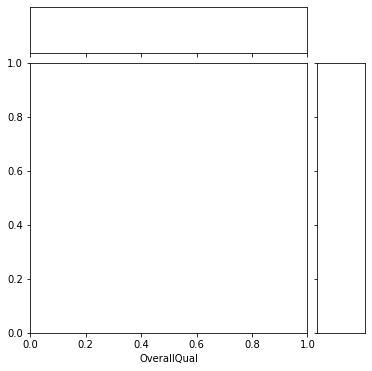

In [146]:
sb.jointplot(x="OverallQual",y="SalePrice",data=house_numeric,kind="kde")

Most of the people have rated the overall qulaity of the house as 5.

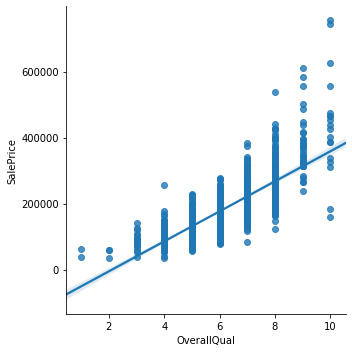

In [56]:
sb.lmplot(x="OverallQual",y="SalePrice",data=house_numeric)
#the houses rated with higher OverallQual have a higher SalePrice

#### Checking for Outliers

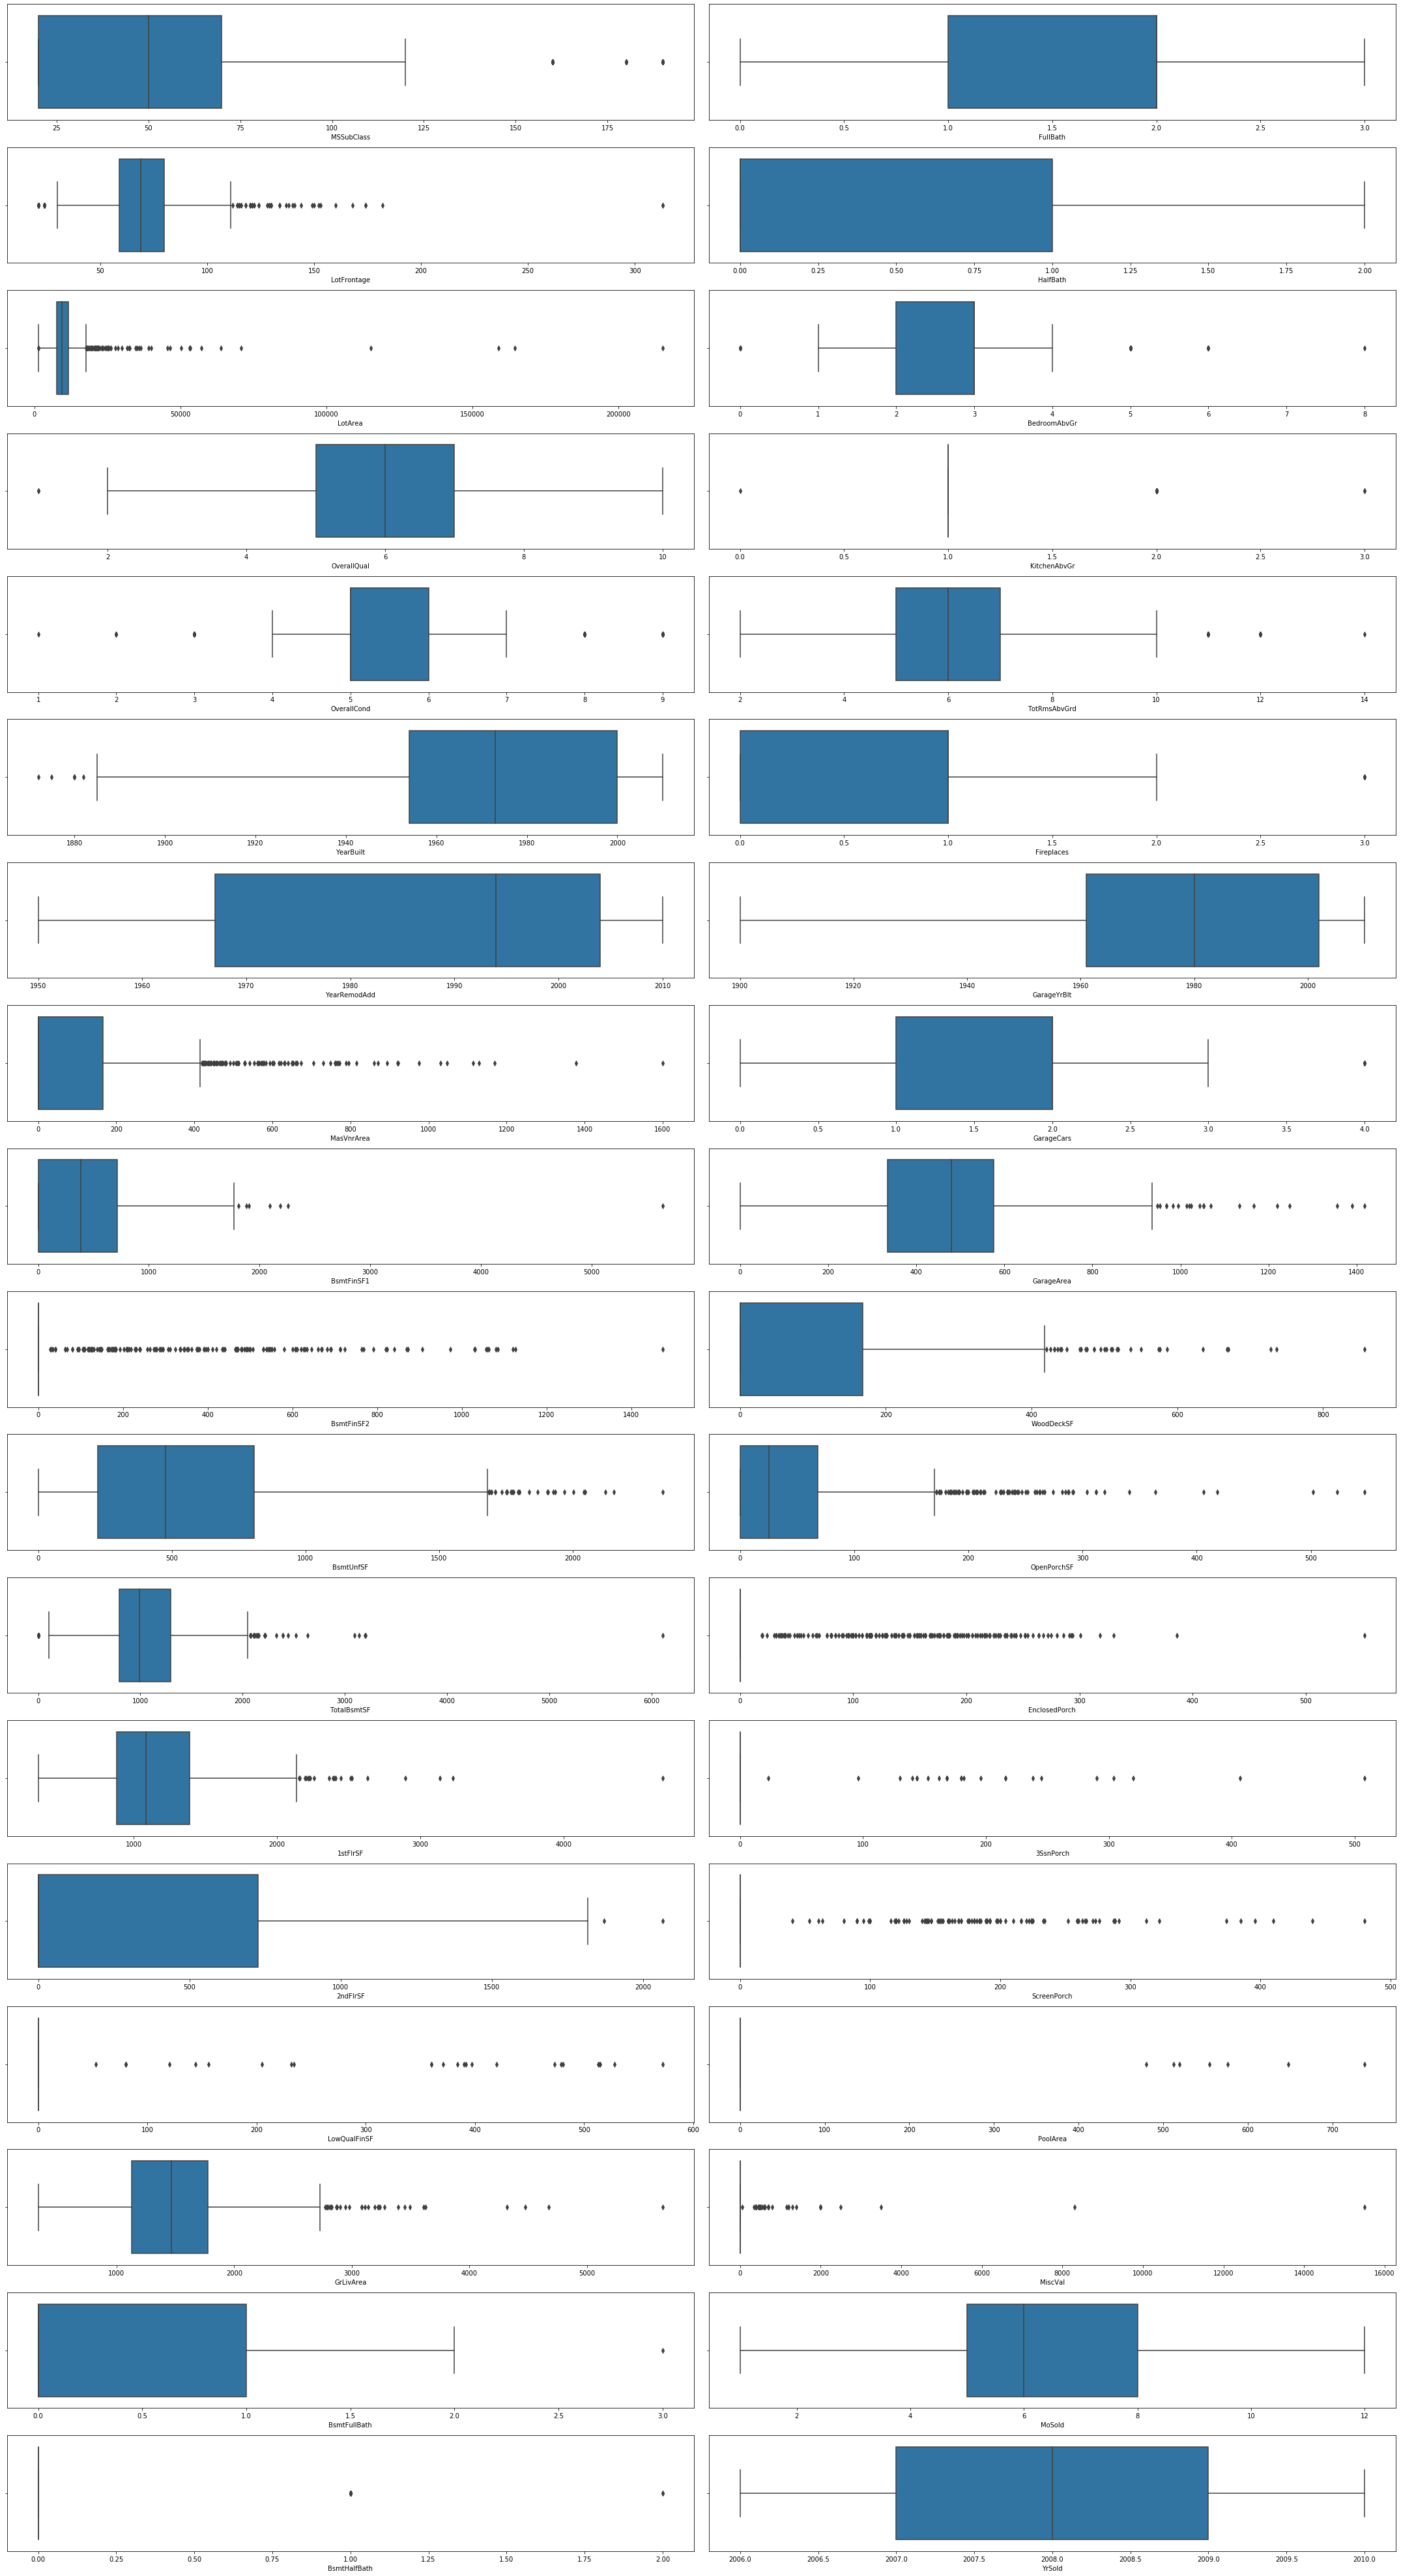

In [57]:
f, axes = plt.subplots(18,2,figsize=(30,55))
count = 0
for i in house_numeric:
    if i != "SalePrice":
        if 0<=count<=17:
            sb.boxplot(house_numeric[i], ax = axes[count, 0])
            count+=1
        elif 18<=count<=35:
            sb.boxplot(house_numeric[i], ax = axes[count-18, 1])
            count+=1    
        else:
            break
plt.tight_layout()

Have decided not to remove any outliers as they might show interesting trends.

### Finding Null Values

In [58]:
#here you need to use both train and test dataset
house.shape

(2919, 77)

In [63]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'En

In [68]:
first_half_house = house[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

In [71]:
first_half_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0


In [69]:
first_half_house.shape

(2919, 38)

In [70]:
first_half_house.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
Alley           2721
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
dtype: int64

LotFrontage --> Linear feet of street connected to property (Numeric)

MasVnrArea --> Masonry veneer area in square feet (Numeric)

MasVnrType --> Masonry veneer type (Categorical)

MSZoning --> Identifies the general zoning classification of the sale. (Categorical)

Alley --> Type of alley access to property (Categorical)

Utilities --> Type of utilities available (Categorical)

Exterior1st --> Exterior covering on house (Categorical)

Exterior2nd --> Exterior covering on house (Categorical)

BsmtQual -->  Evaluates the height of the basement (Categorical)

BsmtCond --> Evaluates the general condition of the basement (Categorical)

BsmtExposure --> Refers to walkout or garden level walls (Categorical)

BsmtFinType1 --> Rating of basement finished area (Categorical)

BsmtFinSF1 --> Type 1 finished square feet (Numeric)

BsmtFinType2 --> Rating of basement finished area (if multiple types) (Categorical)

BsmtFinSF2 --> Type 2 finished square feet (Numeric)

BsmtUnfSF --> Unfinished square feet of basement area (Numeric)

TotalBsmtSF --> Total square feet of basement area (Numeric)


In [77]:
from sklearn.impute import SimpleImputer

In [72]:
lot_frontage = house_numeric[["LotFrontage"]]
masvnr = house_numeric[["MasVnrArea"]]
bsmt1 = house_numeric[["BsmtFinSF1"]]
bsmt2 = house_numeric[["BsmtFinSF2"]]
bsmt3 = house_numeric[["BsmtUnfSF"]]
bsmt4 = house_numeric[["TotalBsmtSF"]]

In [73]:
lot_mas = pd.concat([lot_frontage,masvnr,bsmt1,bsmt2,bsmt3,bsmt4],axis=1)

In [75]:
lot_mas.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,65.0,196.0,706,0,150,856
1,80.0,0.0,978,0,284,1262
2,68.0,162.0,486,0,434,920
3,60.0,0.0,216,0,540,756
4,84.0,350.0,655,0,490,1145


In [99]:
lot_mas.shape

(1460, 6)

In [78]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [79]:
lot_mas = imp.fit_transform(lot_mas)

In [80]:
lot_mas

array([[  65.,  196.,  706.,    0.,  150.,  856.],
       [  80.,    0.,  978.,    0.,  284., 1262.],
       [  68.,  162.,  486.,    0.,  434.,  920.],
       ...,
       [  66.,    0.,  275.,    0.,  877., 1152.],
       [  68.,    0.,   49., 1029.,    0., 1078.],
       [  75.,    0.,  830.,  290.,  136., 1256.]])

In [81]:
lot_mas = pd.DataFrame(data=lot_mas,columns=["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"])

In [82]:
lot_mas.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,65.0,196.0,706.0,0.0,150.0,856.0
1,80.0,0.0,978.0,0.0,284.0,1262.0
2,68.0,162.0,486.0,0.0,434.0,920.0
3,60.0,0.0,216.0,0.0,540.0,756.0
4,84.0,350.0,655.0,0.0,490.0,1145.0


In [83]:
lot_mas.isnull().sum()

LotFrontage    0
MasVnrArea     0
BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
dtype: int64

In [84]:
#house = house.drop(["LotFrontage","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"],axis=1)

In [87]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [98]:
lot_mas.shape

(1460, 6)

In [94]:
house_numeric.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [522]:
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage,MasVnrArea
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,0,2,2008,208500,65.0,196.0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,5,2007,181500,80.0,0.0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,0,9,2008,223500,68.0,162.0
3,70,9550,7,5,1915,1970,216,0,540,756,...,272,0,0,0,0,2,2006,140000,60.0,0.0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,0,12,2008,250000,84.0,350.0


### Feature Scaling

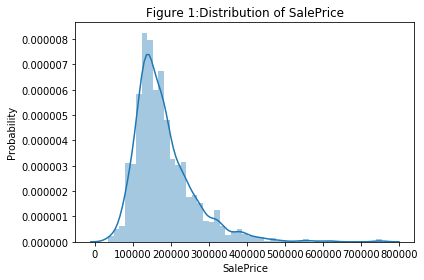

In [523]:
sb.distplot(y)
plt.title("Figure 1:Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Probability")
plt.tight_layout()

By observing figure 1, we can see that the distribution is that of a normal distribution, however it is skewed to the left. The range of the values are also very wide and hence scaling them would be the best! 

#### Points to note:

##### Normalisation

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

##### Standardisation

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=For%20machine%20learning%2C%20every%20dataset,from%200%E2%80%93100%2C000%20and%20higher.

Therefore, it would be best to standardise using Standard Scaler.

In [524]:
#Need to remove the sale Price
house_numeric = house_numeric.drop(["SalePrice"],axis=1)

In [525]:
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea
0,60,8450,7,5,2003,2003,706,0,150,856,...,61,0,0,0,0,0,2,2008,65.0,196.0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,0,5,2007,80.0,0.0
2,60,11250,7,5,2001,2002,486,0,434,920,...,42,0,0,0,0,0,9,2008,68.0,162.0
3,70,9550,7,5,1915,1970,216,0,540,756,...,35,272,0,0,0,0,2,2006,60.0,0.0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,84,0,0,0,0,0,12,2008,84.0,350.0


In [526]:
house_num_temp = house_numeric.copy()

In [527]:
house_num_temp.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea
0,60,8450,7,5,2003,2003,706,0,150,856,...,61,0,0,0,0,0,2,2008,65.0,196.0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,0,0,5,2007,80.0,0.0
2,60,11250,7,5,2001,2002,486,0,434,920,...,42,0,0,0,0,0,9,2008,68.0,162.0
3,70,9550,7,5,1915,1970,216,0,540,756,...,35,272,0,0,0,0,2,2006,60.0,0.0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,84,0,0,0,0,0,12,2008,84.0,350.0


In [528]:
from sklearn.preprocessing import StandardScaler

In [529]:
#Declaring a scaler object
sc = StandardScaler()

#Fitting the scaler to the data
house_num_temp = sc.fit_transform(house_num_temp) 

In [530]:
#house_numeric is a 2D numpy array now, need to convert it into a dataframe
house_num_temp

array([[ 0.07337496, -0.20714171,  0.65147924, ...,  0.13877749,
        -0.22937175,  0.51141841],
       [-0.87256276, -0.09188637, -0.07183611, ..., -0.61443862,
         0.4519361 , -0.57441047],
       [ 0.07337496,  0.07347998,  0.65147924, ...,  0.13877749,
        -0.09311018,  0.32306034],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ...,  1.64520971,
        -0.18395123, -0.57441047],
       [-0.87256276, -0.08016039, -0.79515147, ...,  1.64520971,
        -0.09311018, -0.57441047],
       [-0.87256276, -0.05811155, -0.79515147, ...,  0.13877749,
         0.22483348, -0.57441047]])

In [531]:
house_numeric.columns
#need to find the column names as the columns parameter in the pd.DataFrame takes in index or array-like stuff only

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea'],
      dtype='object')

In [532]:
house_numeric_a = pd.DataFrame(data=house_num_temp, columns=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotFrontage', 'MasVnrArea'])

In [533]:
house_numeric_a.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.229372,0.511418
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.451936,-0.574410
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.093110,0.323060
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.456474,-0.574410
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.633618,1.364570


In [534]:
house_numeric=house_numeric_a

In [535]:
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,-0.459303,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.229372,0.511418
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,0.466465,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.451936,-0.574410
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,-0.313369,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,-0.093110,0.323060
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,-0.687324,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.456474,-0.574410
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,0.199680,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.633618,1.364570


### Non-Numeric Features

In [536]:
house_non_numeric.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Finding Null Values

In [537]:
house_non_numeric.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature have null values.

Since they are all non-numeric values, the strategy to use in the imputer would be "most frequent".

In [538]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [539]:
null_col = house_non_numeric[["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]]

In [540]:
null_col = imp1.fit_transform(null_col)

In [541]:
null_col

array([['Grvl', 'Gd', 'TA', ..., 'Gd', 'MnPrv', 'Shed'],
       ['Grvl', 'Gd', 'TA', ..., 'Gd', 'MnPrv', 'Shed'],
       ['Grvl', 'Gd', 'TA', ..., 'Gd', 'MnPrv', 'Shed'],
       ...,
       ['Grvl', 'TA', 'Gd', ..., 'Gd', 'GdPrv', 'Shed'],
       ['Grvl', 'TA', 'TA', ..., 'Gd', 'MnPrv', 'Shed'],
       ['Grvl', 'TA', 'TA', ..., 'Gd', 'MnPrv', 'Shed']], dtype=object)

In [542]:
null_col = pd.DataFrame(data=null_col,columns=["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"])

In [543]:
null_col.head()

,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Grvl,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
1,Grvl,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
2,Grvl,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
3,Grvl,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Gd,MnPrv,Shed
4,Grvl,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed


In [544]:
house_non_numeric = house_non_numeric.drop(["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"],axis=1)

In [545]:
house_non_numeric = pd.concat([house_non_numeric,null_col],axis=1)

In [546]:
house_non_numeric.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
SaleCondition    0
Alley            0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Electrical       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PoolQC           0
Fence            0
MiscFeature      0
dtype: int64

In [547]:
house_non_numeric.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Gd,MnPrv,Shed
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Gd,MnPrv,Shed


#### Exploratory Data Analysis on Non-Numeric Features

#### One-Hot Encoding of Non-Numeric Features

In [548]:
house_non_numeric.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Alley', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [549]:
dummies = pd.get_dummies(house_non_numeric[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Alley', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']], drop_first=False)

In [550]:
#Viewing the dummies
dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [551]:
#Dropping the original object data type features to make way for the new ones
house_non_numeric = house_non_numeric.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition', 'Alley', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [552]:
house_non_numeric = pd.concat([house_non_numeric, dummies], axis=1)

In [553]:
house_non_numeric.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
